In [2]:
import torch
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import transforms
from torch.utils.data import Dataset

In [4]:
oneImg = Image.open("./data/one.png")
zeroImg = Image.open("./data/zero.png")

In [36]:
to_tensor = transforms.ToTensor()

one_tensor = to_tensor(oneImg)[:-1]
zero_tensor = to_tensor(zeroImg)[:-1]

one_tensor

tensor([[[0.0000, 0.0000, 1.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 1.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 1.0000, 0.0000, 0.0000],
         [0.0000, 1.0000, 1.0000, 1.0000, 0.0000]],

        [[0.0000, 0.0000, 0.9490, 0.0000, 0.0000],
         [1.0000, 1.0000, 0.9490, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.9490, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000]],

        [[0.0000, 1.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000]]])

Text(0.5, 1.0, 'Digit 1')

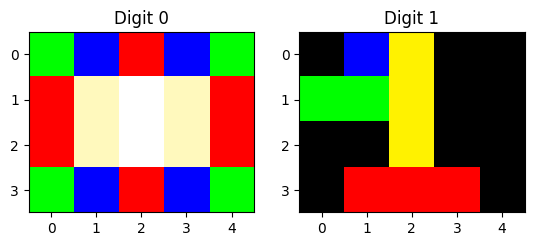

In [37]:
plt.subplot(1, 2, 1)
plt.imshow(zero_tensor.permute(1,2,0))
plt.title("Digit 0")

plt.subplot(1, 2, 2)
plt.imshow(one_tensor.permute(1,2,0))
plt.title("Digit 1")

In [45]:
class DigitDataSet(Dataset):
    def __init__(self, images, labels, transforms=None):
        self.images = images
        self.labels = labels
        self.transforms = transforms

    def __len__(self):
        return len(self.images)

    def __getitem__(self, i):
        img = self.images[i]
        label = self.labels[i]

        if self.transforms:
            img = self.transforms(img)

        return img, label

In [46]:
images = [zeroImg, oneImg]
labels = ['0', '1']

dataset = DigitDataSet(images, labels, transforms.ToTensor())

In [89]:
imgs_t = torch.stack([img[:-1] for img,_ in dataset])

red_channel = imgs_t[:,0]
green_channel = imgs_t[:,1]
blue_channel = imgs_t[:,2]

means = torch.tensor([red_channel.mean(), green_channel.mean(), blue_channel.mean()])
stds = torch.tensor([red_channel.std(), green_channel.std(), blue_channel.std()])

In [133]:
imgs_t = torch.stack([img[:-1] for img, _ in dataset], dim=-1)
imgs_t.view(3, -1).mean(dim=1)

tensor([0.4500, 0.3688, 0.2491])

In [6]:
a = torch.tensor([
    [
        [10, 20],
        [40, 50],
    ],
    [
        [100, 200],
        [400, 500],
    ],
    [
        [1, 2],
        [4, 5],
    ],
])

b = torch.tensor([
    [
        [60, 70],
        [80, 90],
    ],
    [
        [600, 700],
        [800, 900],
    ],
    [
        [6, 7],
        [8, 9],
    ],
])

expected = torch.tensor([
    [
        [
            [10, 60],
            [20, 70],
        ],
        [
            [40, 80],
            [50, 90],
        ],
    ],
    [
        [
            [100, 600],
            [200, 700],
        ],
        [
            [400, 800],
            [500, 900],
        ],
    ],
    [
        [
            [1, 6],
            [2, 7],
        ],
        [
            [4, 8],
            [5, 9],
        ],
    ],
])


(torch.stack([a, b], dim=-1) != expected).sum()

tensor(0)

In [ ]:
a = torch.tensor([
    [1,2],
    [3,4],
    [5,6]
])
b = torch.tensor([
    [10,20],
    [30,40],
    [50,60]
])

torch.stack([a,b], dim=2)